<a href="https://colab.research.google.com/github/CapZondar/Python-first-steps/blob/main/Food_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Sales prediction project

Project by John Vincent "JT" Aquilizan

In [1]:
#initial mounting of drive and importing the necessary packages for the project.
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

Mounted at /content/drive


In [2]:
#assigning of files and creating dataframe

filename ='/content/drive/MyDrive/Coding Dojo - Data Science/02 Week 2: Pandas/sales_predictions.csv'
df = pd.read_csv(filename)

#inspecting whether the data was loaded correctly
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#checking the data content and also data type to prepare for data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
#checking for null values
df.isnull().sum()

#upon checking, 2 rows have multiple null values. (Item_Weight and Outlet_Size)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
#as for outlet_Size, since the information is not relevant at this time of the activity, I am dropping the specific column.

df.drop('Outlet_Size', axis = 1,inplace = True)

In [6]:
#filling in missing data for 'Item_Weight' to address another item in this activity
#we used the 'Item_Identifier' column as key to fill in the missing values for missing weight. Reason behind this is since it is the same item, it should have the same weight.
item_weight = df['Item_Weight'].isna()
item_indexer = df[['Item_Identifier','Item_Weight']][~item_weight]
dict1 = item_indexer.set_index('Item_Identifier')['Item_Weight'].T.to_dict()
df['Item_Weight'] = df.Item_Identifier.map(dict1)

df.isnull().sum()
#Upon checking, there's 4 unique values of 'Item_Identifier' with no 'Item_Weight'. Since this number of rows will not affect the overall activity, I will not be removing these but will also not be including it in the calculation.


Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [7]:
#checking data for any duplicate data and dropping them

df[df.duplicated(keep = False)]

#despite python saying that there's no value duplicated from the previous line, will still run the line to drop the duplicate.
df.drop_duplicates(inplace = True)

In [8]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [9]:
df.replace({'Item_Fat_Content': {'LF': 'Low Fat', 'low fat': 'Low Fat','reg':'Regular'}},inplace = True)

df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976


In [10]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [11]:
#For any numerical columns, obtain the summary statistics of each (min, max, mean)

round(df.agg({'Item_Weight':['min','max','mean'],
        'Item_Visibility':['min','max','mean'],
        'Item_Outlet_Sales':['min','max','mean']}),2)

,Item_Weight,Item_Visibility,Item_Outlet_Sales
min,4.56,0.00,33.29
max,21.35,0.33,13086.96
mean,12.88,0.07,2181.29


In [12]:
#First we want to see how the distribution of our data and confirm whether we have a healthy set of data.
#I will only be plotting the data that is most relevant.
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
#inspecting the data once more to check which columns we have left after cleaning.

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


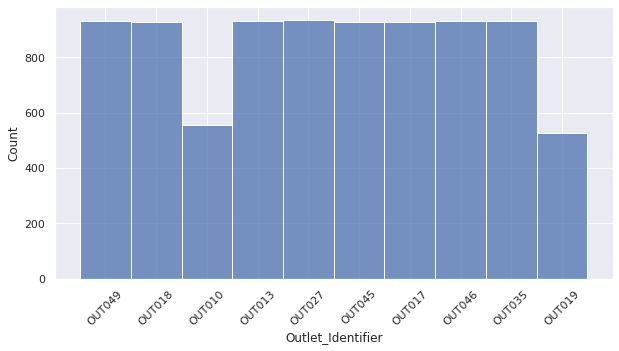

In [85]:
#to make sure we have a healthy distribution of data from the outlets, we'll be plotting the outlet identifier.
sns.set(style='darkgrid')


plt.figure(figsize=(10,5))
sns.histplot(df['Outlet_Identifier'])
plt.xticks(rotation=45);

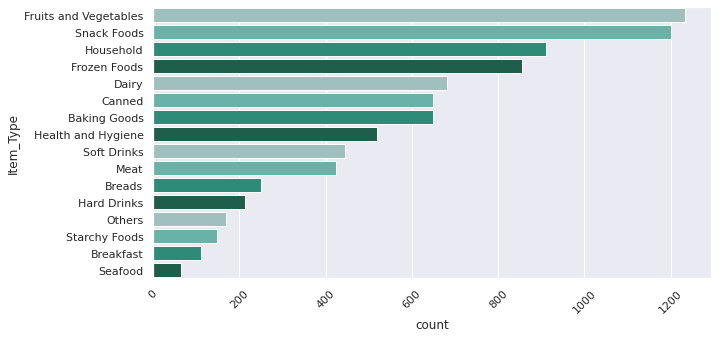

In [112]:
#We want to check what item type we have the most

sns.set(style='darkgrid')
plt.figure(figsize=(10,5))


type_sort = df.groupby('Item_Type').size().sort_values().index[::-1] 
fig_filt = df['Item_Type']

sns.countplot(y=fig_filt,order=type_sort,palette=['#99c6c4','#5cbeb1','#1f9a80','#166851'])
plt.xticks(rotation=45);

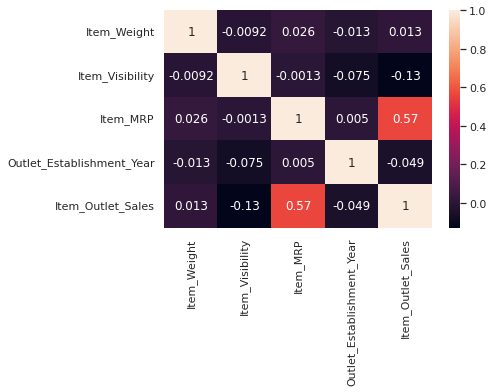

In [116]:
#now we want to check which factors correlate to eachother
corr = df.corr()
sns.heatmap(corr,annot=True);

#Only item mrp and item outlet sales can be observed to have a moderate correlation

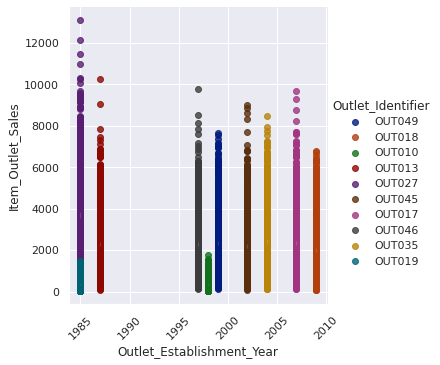

In [176]:
#We also want to check if the establishment year of the outlet is resulting in higher sales
sns.set(style='darkgrid')

sns.lmplot(data=df,x='Outlet_Establishment_Year',y='Item_Outlet_Sales',hue='Outlet_Identifier',palette='dark',)
plt.xticks(rotation=45);

#Very minimal effect on sales can be observed when basing on the establishment year

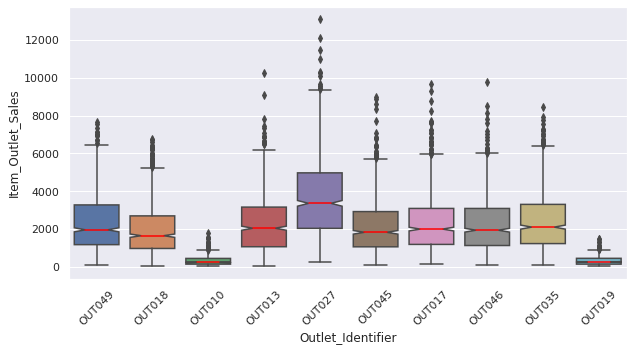

In [182]:
#Checking which stores have the highest average sales

plt.figure(figsize=(10,5))
sns.boxplot(data=df,y='Item_Outlet_Sales',x='Outlet_Identifier',notch=True,medianprops={'color':'red'})
plt.xticks(rotation=45);

#out018 has noticably lower average sales as compared to other outlets, both out010 and out019 won't be considered at this time as both have lower observations than the other outlets

#This is a WIP and all documentations needed will be added by the end of the project